In [1]:
import sys,os,pdb
import numpy as np
from astropy import units as un, constants as cons
import matplotlib
%matplotlib inline
sys.path.append('../pysrc')
import cooling_flow as CF
import HaloPotential as Halo
import WiersmaCooling as Cool

In [2]:
import pylab as pl
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=10)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
fig_width_half = 3.4

## integrate solution with angular momentum from outer boundary

In [2]:
spin = 0.035
Rvir = 200*un.kpc
Rcirc=10*un.kpc
vc = 200*un.km/un.s
Lambda0 = 1e-22*un.erg*un.cm**3*un.s**-1
potential = Halo.PowerLaw_with_AngularMomentum(0,vc,Rvir,Rcirc)

Mdot=1*un.Msun/un.yr          #mass inflow rate
max_step = 0.01             #resolution of solution in ln(r)
R_max = 0.75*Rvir              #outer radius of integration
cooling = Cool.Constant_Cooling(Lambda0)#(lMhalo,Mgalaxy,z)

In [3]:
ress = CF.shoot_from_outer_boundary(potential,cooling,R_circ=Rcirc,Mdot=Mdot,R_max=R_max, epsilon=0.05,
                                      max_step=max_step,pr=True,return_all_results=True)

Integrated with log T(R_circ)=6.25398, minimum radius reached 52 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.27468, minimum radius reached 39 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.28503, minimum radius reached 28 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.29020, minimum radius reached 20 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.29279, minimum radius reached 14 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.29408, minimum radius reached 10 kpc, stop reason: max R reached
Integrated with log T(R_circ)=6.29344, minimum radius reached 11 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.29376, minimum radius reached 10 kpc, stop reason: max R reached
Integrated with log T(R_circ)=6.29360, minimum radius reached 10 kpc, stop reason: max R reached
Integrated with log T(R_circ)=6.29352, minimum radius reached 10 kpc, stop reason: lowT
Integrated with log T(R_circ)=6.29356, minimum radius reached 10 kpc, stop reason: max R reac

## plotting

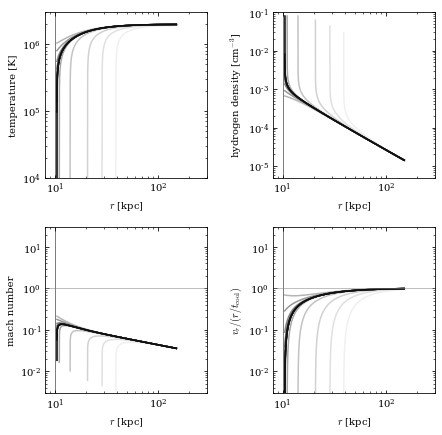

In [7]:
fig = pl.figure(figsize=(7,7))
pl.subplots_adjust(hspace=0.3,wspace=0.4)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    for ires,res in enumerate(ress.values()):  
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        c = '%.2f'%(1-ires/len(ress))
        pl.loglog(res.Rs(),ys,c=c)
    pl.xlim(8,300)
    pl.xlabel(r'$r$ [kpc]')
    pl.axvline(Rcirc.value,lw=0.5,c='k')
    if iPanel==0:
        pl.ylabel(r'temperature [K]')
        pl.ylim(1e4,3e6)
    if iPanel==1: 
        pl.ylabel(r'hydrogen density [cm$^{-3}$]')
        pl.ylim(0.5e-5,0.1)
    if iPanel==2:
        pl.ylabel(r'mach number')
        pl.ylim(0.003,30)
        pl.axhline(1.,c='.5',lw=0.5)
    if iPanel==3: 
        pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
        pl.ylim(0.003,30)
        pl.axhline(1.,c='.5',lw=0.5)
# pl.savefig('../figures/solutions_for_noneq_calculation.pdf',bbox_inches='tight')

In [37]:
str_AM = 'AM'
np.savez('../pyobjs/Mdot%d_vc%d'%(res.Mdot.value,vc.value)+str_AM+'.npz',
        nHs=res.nHs().to('cm**-3').value,
         Ts=res.Ts().to('K').value,
         vs=res.vs().to('km/s').value,
         rs=res.Rs().to('kpc').value)

In [36]:
(2.9+(2.9**2-4)**0.5)/2., (2.9-(2.9**2-4)**0.5)/2.

(2.5, 0.3999999999999999)

In [3]:
thetas = np.arange(0,np.pi/2,1e-3)
rs = (2.5)**0.5*np.sin(thetas)
Rs=rs*np.sin(thetas)
zs = rs*np.cos(thetas)

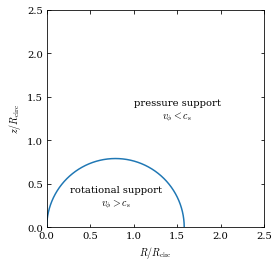

In [5]:
ax = pl.subplot(111)
pl.plot(Rs,zs)
pl.text(1.5,1.4,'pressure support',ha='center')
pl.text(0.8,0.4,'rotational support',ha='center')
pl.text(1.5,1.25,r'$v_\phi<c_{\rm s}$',ha='center')
pl.text(0.8,0.25,r'$v_\phi>c_{\rm s}$',ha='center')
ax.axis('square')
pl.xlim(0,2.5)
pl.ylim(0,2.5)
pl.xlabel(r'$R/R_{\rm circ}$')
pl.ylabel(r'$z/R_{\rm circ}$')
pl.savefig("sonicsurface.pdf",bbox='tight')

In [4]:
rs = 10.**np.arange(-1,1.0005,0.01)
thetas = np.arange(0,np.pi+0.005,0.01)
r,theta = np.meshgrid(rs,thetas)
R=r*np.sin(theta)
z = r*np.cos(theta)

In [5]:
nH0 = 0.8e-3 * r**-1.5*un.cm**-3
T0 = 2.0e6*un.K
tcool0 = 370*r**1.5 *un.Myr
vr0 = -27*r**-0.5*un.km/un.s
mach0 = 0.13*r**-0.5

In [9]:
epsilon = r**-2
vphi = r**-1*np.sin(theta)
s = np.sin(theta)**2
nHT = nH0*T0*(1+epsilon*(3/4*s  -5/8))
nH  = nH0   *(1+epsilon*(11/4*s -35/24))
T   = T0    *(1-epsilon*(2*s    -5/6))
vr  = vr0   *(1-epsilon*(23/12*s - 65/72))
vth = -vr0  *(5/18)*epsilon*np.sin(2*theta)

In [14]:
vr[:,rind]

<Quantity [-29.15491413, -29.15327771, -29.14836909, -29.14019024,
           -29.12874444, -29.11403625, -29.09607156, -29.07485757,
           -29.05040274, -29.02271687, -28.99181103, -28.95769758,
           -28.92039017, -28.87990371, -28.83625441, -28.78945972,
           -28.73953835, -28.68651028, -28.63039672, -28.57122012,
           -28.50900413, -28.44377365, -28.37555477, -28.30437477,
           -28.23026213, -28.15324649, -28.07335866, -27.99063058,
           -27.90509536, -27.81678719, -27.72574141, -27.63199444,
           -27.53558376, -27.43654795, -27.33492661, -27.23076039,
           -27.12409096, -27.01496098, -26.90341411, -26.78949496,
           -26.6732491 , -26.55472302, -26.43396414, -26.31102075,
           -26.18594203, -26.05877802, -25.92957957, -25.79839836,
           -25.66528686, -25.53029832, -25.39348673, -25.25490682,
           -25.114614  , -24.97266441, -24.82911481, -24.68402262,
           -24.53744588, -24.38944322, -24.24007384, -24.08939

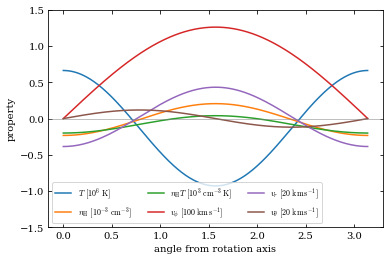

In [16]:
ax = pl.subplot(111)
rind = np.searchsorted(rs,2.5**0.5)
for iLine in range(6):    
    if iLine==0: val,label = (T-T0)/1e6,r'$T\ [10^6\ {\rm K}]$'
    if iLine==1: val,label = (nH-nH0)/1e-3, r'$n_{\rm H}\ [10^{-3}\ {\rm cm}^{-3}]$'
    if iLine==2: val,label = (nHT-nH0*T0)/1e3, r'$n_{\rm H} T\ [10^{3}\ {\rm cm}^{-3}\,{\rm K}]$'
    if iLine==3: val,label = vphi*2*un.km/un.s, r'$v_\phi\ [100\ {\rm km}\,{\rm s}^{-1}]$'
    if iLine==4: val,label = (vr-vr0)/20, r'$v_{r}\ [20\ {\rm km}\,{\rm s}^{-1}]$'
    if iLine==5: val,label = vth/20, r'$v_\theta\ [20\ {\rm km}\,{\rm s}^{-1}]$'
    pl.plot(thetas,val[:,rind],label=label)
pl.legend(fontsize=8,ncol=3)#,loc='lower left')
pl.axhline(0,c='.5',ls='-',lw=0.5)
pl.ylim(-1.5,1.5)
pl.xlabel(r'angle from rotation axis')
pl.ylabel(r'property')
pl.savefig("thetadependence.pdf",bbox='tight')

In [128]:
1+5.5/4

2.375

In [129]:
nH[-1,rind] / nH[0,rind]

<Quantity 1.65967863>

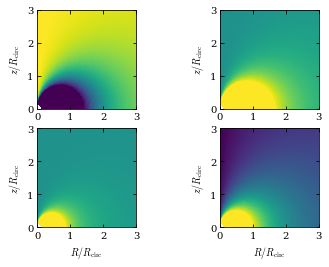

In [100]:
for iPanel in range(4):
    ax = pl.subplot(2,2,iPanel+1)
    if iPanel==0: val,vmax = T,T0.value
    if iPanel==1: val,vmax = nH/nH0, 2
    if iPanel==2: val,vmax = nHT/(nH0*T0), 2
    if iPanel==3: val,vmax = vphi*un.km/un.s, 1
    pl.pcolor(R,z,val.value,vmin=0,vmax=vmax)
    ax.axis('square')
    pl.xlim(0,3)
    pl.ylim(0,3)
    pl.xlabel(r'$R/R_{\rm circ}$')
    pl.ylabel(r'$z/R_{\rm circ}$')
# pl.savefig("sonicsurface.pdf",bbox='tight')

In [89]:
vR = vr*np.sin(theta)+vtheta*np.cos(theta)
vz = vr*np.cos(theta)-vtheta*np.sin(theta)

Text(0, 0.5, '$z/R_{\\rm circ}$')

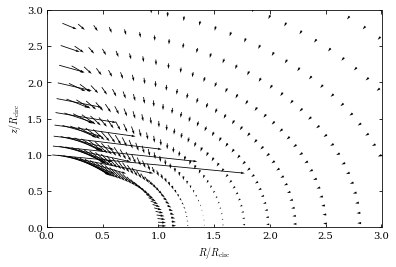

In [94]:
pl.quiver(R[::5,100::5],z[::5,100::5],vR.value[::5,100::5],vz.value[::5,100::5])
ax.axis('square')
pl.xlim(0,3)
pl.ylim(0,3)
pl.xlabel(r'$R/R_{\rm circ}$')
pl.ylabel(r'$z/R_{\rm circ}$')

In [17]:
3

3

# accretion rate density vs. R/Rcirc

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  


(0.1, 100)

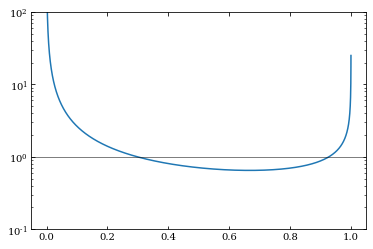

In [22]:
rs = np.arange(0,1,0.0001)
pl.semilogy(rs, (4*rs*(1-rs)**0.5)**-1)
pl.axhline(1,c='k',lw=0.5)
pl.ylim(0.1,100)

In [23]:
2**2*10**0.09*10**-0.5

1.5561805799771224